In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.aer import AerSimulator, AerProvider
from qiskit import IBMQ
from qiskit.compiler import transpile
from time import perf_counter

In [2]:
# Initialization
qubits = QuantumRegister(3)
measurement = ClassicalRegister(3)
circuit = QuantumCircuit(qubits, measurement)

In [3]:
# Build the circuit
start = perf_counter()
circuit.h(qubits[0])
circuit.h(qubits[1])
circuit.ccx(qubits[0], qubits[1], qubits[2])
circuit.measure(qubits, measurement)
end = perf_counter()

In [4]:
print(f"Circuit construction took {(end - start)} sec.")
print(circuit)

Circuit construction took 0.0006855840038042516 sec.
      ┌───┐     ┌─┐      
q0_0: ┤ H ├──■──┤M├──────
      ├───┤  │  └╥┘┌─┐   
q0_1: ┤ H ├──■───╫─┤M├───
      └───┘┌─┴─┐ ║ └╥┘┌─┐
q0_2: ─────┤ X ├─╫──╫─┤M├
           └───┘ ║  ║ └╥┘
c0: 3/═══════════╩══╩══╩═
                 0  1  2 


In [6]:
active_qubits = {}
for op in circuit.data: 
    print(op)
    if op[0].name != "barrier" and op[0].name != "snapshot": 
        for qubit in op[1]: 
            active_qubits[qubit.index] = True

print(f"Width: {len(active_qubits)} qubits")

CircuitInstruction(operation=Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q0'), 0),), clbits=())
CircuitInstruction(operation=Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q0'), 1),), clbits=())
CircuitInstruction(operation=Instruction(name='ccx', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q0'), 0), Qubit(QuantumRegister(3, 'q0'), 1), Qubit(QuantumRegister(3, 'q0'), 2)), clbits=())
CircuitInstruction(operation=Instruction(name='measure', num_qubits=1, num_clbits=1, params=[]), qubits=(Qubit(QuantumRegister(3, 'q0'), 0),), clbits=(Clbit(ClassicalRegister(3, 'c0'), 0),))
CircuitInstruction(operation=Instruction(name='measure', num_qubits=1, num_clbits=1, params=[]), qubits=(Qubit(QuantumRegister(3, 'q0'), 1),), clbits=(Clbit(ClassicalRegister(3, 'c0'), 1),))
CircuitInstruction(operation=Instruction(name='measure', num_qubits=1, num_clbits=1, params=[]), qubi

/var/folders/m3/0nh3sx950bv45b3j2vh443gr0000gn/T/ipykernel_49236/2553681689.py:6: DeprecationWarning: Back-references to from Bit instances to their containing Registers have been deprecated. Instead, inspect Registers to find their contained Bits.
  active_qubits[qubit.index] = True


In [7]:
print(f"Depth: {circuit.depth()}")

Depth: 3


In [17]:
print(f"Gate counts: {circuit.count_ops()}")

Gate counts: OrderedDict([('measure', 3), ('h', 2), ('ccx', 1)])


In [8]:
# Transpile the circuit to something that can run on the Quantum machine
provider = IBMQ.load_account()

In [9]:
print(provider.backends(None, None))

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_oslo') from IBMQ(hub='ibm-q', group='open', project='main')>]


In [10]:
machine = "ibm_nairobi"
backend = provider.get_backend(machine)

In [21]:
print(f"Transpiling for {machine}...")
start = perf_counter()
circuit = transpile(circuit, backend=backend, optimization_level=1)
end = perf_counter()
print(f"Compiling and optimizing took {(end - start)} sec.")
print(circuit)

Transpiling for ibm_nairobi...
Compiling and optimizing took 51.11993958400012 sec.
global phase: 9π/8
                                                                           »
ancilla_0 -> 0 ────────────────────────────────────────────────────────────»
                                                                           »
ancilla_1 -> 1 ────────────────────────────────────────────────────────────»
                                                                           »
ancilla_2 -> 2 ────────────────────────────────────────────────────────────»
                                                                           »
ancilla_3 -> 3 ────────────────────────────────────────────────────────────»
               ┌─────────┐┌────┐┌─────────┐┌───┐┌──────────┐     ┌───┐     »
     q1_2 -> 4 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤ X ├┤ Rz(-π/4) ├──■──┤ X ├──■──»
               ├─────────┤├────┤├─────────┤└─┬─┘└──────────┘┌─┴─┐└─┬─┘┌─┴─┐»
     q1_1 -> 5 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├──■────

In [22]:
active_qubits = {}
for op in circuit.data: 
    if op[0].name != "barrier" and op[0].name != "snapshot": 
        for qubit in op[1]: 
            active_qubits[qubit.index] = True
print(f"Width: {len(active_qubits)} qubits")

Width: 3 qubits


/var/folders/08/whs73mdj3yj95d3jcmlq10yh0000gn/T/ipykernel_1479/4104809520.py:5: DeprecationWarning: Back-references to from Bit instances to their containing Registers have been deprecated. Instead, inspect Registers to find their contained Bits.
  active_qubits[qubit.index] = True


In [23]:
print(f"Depth: {circuit.depth()}")

Depth: 20


In [24]:
print(f"Gate counts: {circuit.count_ops()}")

Gate counts: OrderedDict([('rz', 14), ('cx', 12), ('sx', 4), ('measure', 3), ('barrier', 1)])


In [25]:
# Simulate a run on the machine and retrieve real gate information to model the output with real errors
sim = AerSimulator.from_backend(backend)
result = sim.run(circuit).result()
counts = result.get_counts(circuit)
for (measured_state, count) in counts.items(): 
    big_endian_state = measured_state[::-1]
    print(f"Measured {big_endian_state} {count} times.")

Measured 101 25 times.
Measured 011 21 times.
Measured 001 31 times.
Measured 100 216 times.
Measured 110 33 times.
Measured 111 200 times.
Measured 010 241 times.
Measured 000 257 times.


In [26]:
print(backend.properties().gates[0].to_dict())

{'qubits': [0], 'gate': 'id', 'parameters': [{'date': datetime.datetime(2022, 7, 27, 0, 15, 10, tzinfo=tzlocal()), 'name': 'gate_error', 'unit': '', 'value': 0.00029620107778415374}, {'date': datetime.datetime(2022, 7, 27, 9, 50, 17, tzinfo=tzlocal()), 'name': 'gate_length', 'unit': 'ns', 'value': 35.55555555555556}], 'name': 'id0'}


In [27]:
from qiskit import execute, Aer
from qiskit.visualization import plot_histogram
from qiskit.providers.aer.noise import NoiseModel

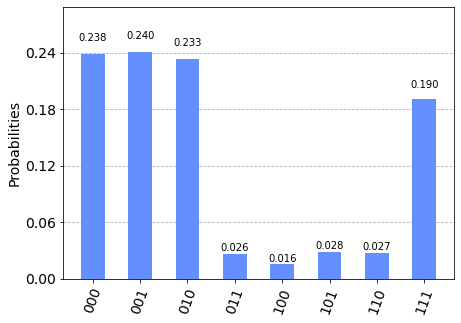

In [28]:
# Building noise models from backend properties
noise_model = NoiseModel.from_backend(backend)

# Get coupling map from backend
coupling_map = backend.configuration().coupling_map

# Get basis gates from noise model
basis_gates = noise_model.basis_gates

# print(Aer.backends())

# Perform a noise simulation
result = execute(circuit, Aer.get_backend('aer_simulator'),
                 coupling_map=coupling_map,
                 basis_gates=basis_gates,
                 noise_model=noise_model).result()
counts = result.get_counts(0)
plot_histogram(counts)

In [29]:
from qiskit.providers.fake_provider import FakeMontreal

backend = FakeMontreal()

qubits = QuantumRegister(3)
measurement = ClassicalRegister(3)
circuit = QuantumCircuit(qubits, measurement)

circuit.h(qubits[0])
circuit.h(qubits[1])
circuit.ccx(qubits[0], qubits[1], qubits[2])
circuit.measure(qubits, measurement)
circuit.draw()

┌───┐     ┌─┐      
q29_0: ┤ H ├──■──┤M├──────
       ├───┤  │  └╥┘┌─┐   
q29_1: ┤ H ├──■───╫─┤M├───
       └───┘┌─┴─┐ ║ └╥┘┌─┐
q29_2: ─────┤ X ├─╫──╫─┤M├
            └───┘ ║  ║ └╥┘
 c2: 3/═══════════╩══╩══╩═
                  0  1  2

In [30]:
transpiled_circuit = transpile(circuit, backend)
transpiled_circuit.draw()

global phase: 9π/8
                                                                             »
  ancilla_0 -> 0 ────────────────────────────────────────────────────────────»
                                                                             »
  ancilla_1 -> 1 ────────────────────────────────────────────────────────────»
                                                                             »
  ancilla_2 -> 2 ────────────────────────────────────────────────────────────»
                                                                             »
  ancilla_3 -> 3 ────────────────────────────────────────────────────────────»
                                                                             »
  ancilla_4 -> 4 ────────────────────────────────────────────────────────────»
                                                                             »
  ancilla_5 -> 5 ────────────────────────────────────────────────────────────»
                                                                             »
  ancilla_6 -> 6 ────────────────────────────────────────────────────────────»
                                                                             »
  ancilla_7 -> 7 ────────────────────────────────────────────────────────────»
                                                                             »
  ancilla_8 -> 8 ────────────────────────────────────────────────────────────»
                                                                             »
  ancilla_9 -> 9 ────────────────────────────────────────────────────────────»
                                                                             »
ancilla_10 -> 10 ────────────────────────────────────────────────────────────»
                 ┌─────────┐┌────┐┌─────────┐                                »
     q29_0 -> 11 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├────────────────────────────────»
                 └─────────┘└────┘└─────────┘                                »
ancilla_11 -> 12 ────────────────────────────────────────────────────────────»
                 ┌─────────┐┌────┐┌─────────┐┌───┐┌──────────┐     ┌───┐     »
     q29_2 -> 13 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤ X ├┤ Rz(-π/4) ├──■──┤ X ├──■──»
                 ├─────────┤├────┤├─────────┤└─┬─┘└──────────┘┌─┴─┐└─┬─┘┌─┴─┐»
     q29_1 -> 14 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├──■──────────────┤ X ├──■──┤ X ├»
                 └─────────┘└────┘└─────────┘                 └───┘     └───┘»
ancilla_12 -> 15 ────────────────────────────────────────────────────────────»
                                                                             »
ancilla_13 -> 16 ────────────────────────────────────────────────────────────»
                                                                             »
ancilla_14 -> 17 ────────────────────────────────────────────────────────────»
                                                                             »
ancilla_15 -> 18 ────────────────────────────────────────────────────────────»
                                                                             »
ancilla_16 -> 19 ────────────────────────────────────────────────────────────»
                                                                             »
ancilla_17 -> 20 ────────────────────────────────────────────────────────────»
                                                                             »
ancilla_18 -> 21 ────────────────────────────────────────────────────────────»
                                                                             »
ancilla_19 -> 22 ────────────────────────────────────────────────────────────»
                                                                             »
ancilla_20 -> 23 ────────────────────────────────────────────────────────────»
                                                                             »
ancilla_21 -> 24 ────────────────────────────────────────────────────────────»
                               

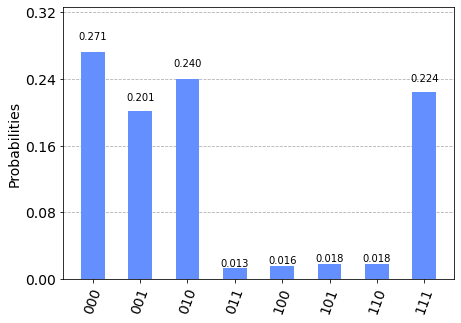

In [31]:
job = backend.run(transpiled_circuit)
counts = job.result().get_counts()
plot_histogram(counts)